In [9]:
!pip install imageio[ffmpeg]  -q
!pip install Pillow -q
!pip install scikit-image -q
!pip install ipywidgets -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.2 MB/s eta 0:00:00


In [12]:
!pip install scikit-fuzzy -q
!pip install opencv-python -q
!pip install scikit-image -q
!pip install matplotlib -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.2 MB/s eta 0:00:00


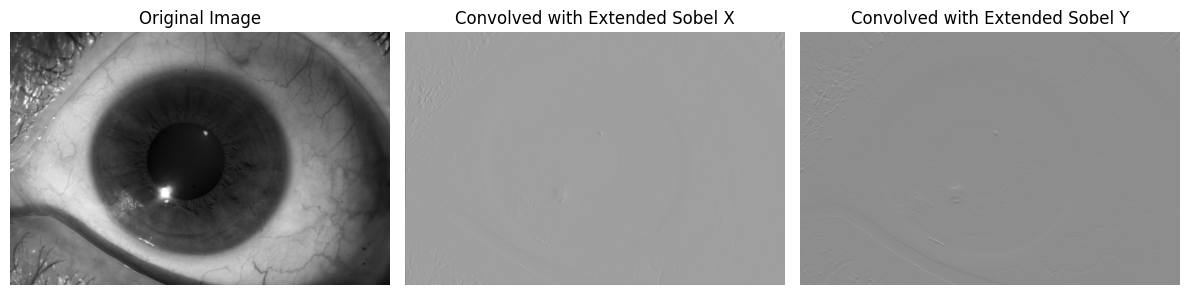

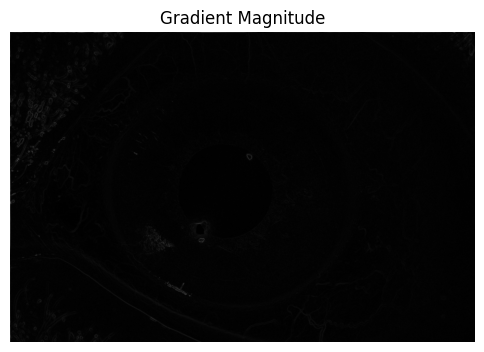

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from skimage import color
from PIL import Image

# Load the image using PIL and convert it to grayscale
image_path = "/content/1-IMG_2016_10_26_9999_225.JPG"
image = Image.open(image_path)
image = image.convert("L")  # Convert to grayscale
image = np.array(image)  # Convert to NumPy array

# Define Sobel kernels for x and y directions
sobel_x = np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]])

sobel_y = np.array([[1, 2, 1],
                     [0, 0, 0],
                     [-1, -2, -1]])

# Create a larger Sobel kernel (10x10) by extending the original kernels
def extend_sobel(kernel, size=10):
    extended_kernel = np.zeros((size, size))
    center = size // 2
    ksize = kernel.shape[0]
    start = center - ksize // 2
    extended_kernel[start:start + ksize, start:start + ksize] = kernel
    return extended_kernel

# Extend the Sobel kernels to 10x10
sobel_x_extended = extend_sobel(sobel_x)
sobel_y_extended = extend_sobel(sobel_y)

# Perform convolution
convolved_x = convolve2d(image, sobel_x_extended, mode='same', boundary='wrap')
convolved_y = convolve2d(image, sobel_y_extended, mode='same', boundary='wrap')

# Calculate the gradient magnitude
gradient_magnitude = np.sqrt(convolved_x**2 + convolved_y**2)
gradient_magnitude = gradient_magnitude / np.max(gradient_magnitude) * 255  # Normalize for visualization
gradient_magnitude = gradient_magnitude.astype(np.uint8)  # Convert to uint8 for displaying

# Plot the original image and the Sobel edge detection results
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Convolved with Extended Sobel X')
plt.imshow(convolved_x, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Convolved with Extended Sobel Y')
plt.imshow(convolved_y, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# Plot Gradient Magnitude
plt.figure(figsize=(6, 6))
plt.title('Gradient Magnitude')
plt.imshow(gradient_magnitude, cmap='gray')
plt.axis('off')
plt.show()


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skimage import color, filters, io
import cv2

In [17]:
# Load the image (make sure to upload an image of an eye)
image_path = "/content/1-IMG_2016_10_26_9999_225.JPG"  # Change this to your image path
image = io.imread(image_path)

# Convert to grayscale
gray_image = color.rgb2gray(image)
gray_image = (gray_image * 255).astype(np.uint8)  # Convert to uint8

# Apply Gaussian filter for smoothing
smoothed_image = filters.gaussian(gray_image, sigma=1)


In [19]:
# Define fuzzy membership functions
# Let's assume intensity range [0, 255]
intensity = np.arange(0, 256, 1)
low = fuzz.gaussmf(intensity, 50, 15)   # Membership for low intensity (dark regions)
medium = fuzz.gaussmf(intensity, 128, 30)  # Membership for medium intensity
high = fuzz.gaussmf(intensity, 200, 15)  # Membership for high intensity (bright regions)

In [20]:
# Create a function to apply the fuzzy inference system
def fuzzy_edge_detection(image):
    rows, cols = image.shape
    edge_map = np.zeros_like(image)

    for i in range(rows):
        for j in range(cols):
            pixel_intensity = image[i, j]

            # Calculate membership values
            low_mem = fuzz.interp_membership(intensity, low, pixel_intensity)
            medium_mem = fuzz.interp_membership(intensity, medium, pixel_intensity)
            high_mem = fuzz.interp_membership(intensity, high, pixel_intensity)

            # Apply fuzzy rules (simple example)
            edge_strength = max(low_mem, high_mem)  # High edge strength at low and high intensities

            edge_map[i, j] = edge_strength * 255  # Scale to 255 for visualization

    return edge_map


In [22]:
# Apply fuzzy edge detection
fuzzy_edge_image = fuzzy_edge_detection(smoothed_image)

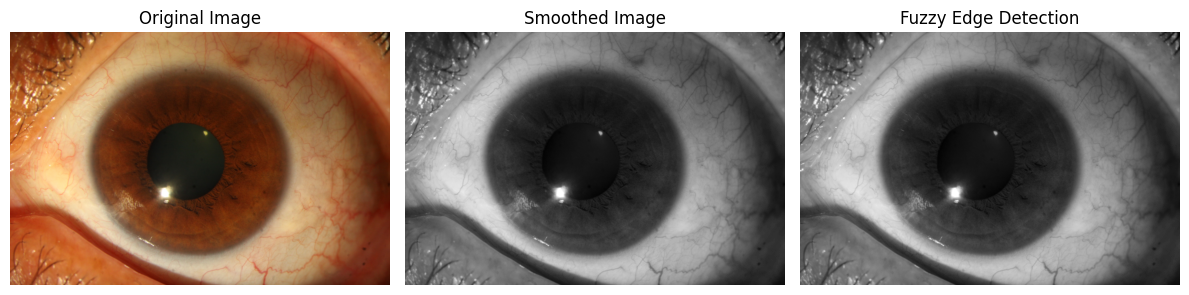

In [23]:
# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Smoothed Image')
plt.imshow(smoothed_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Fuzzy Edge Detection')
plt.imshow(fuzzy_edge_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


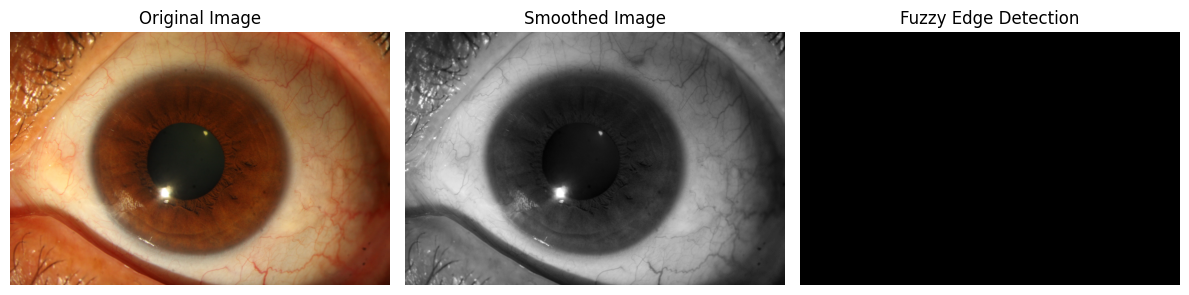

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skimage import color, filters, io
from skimage import feature

# Load the image (make sure to upload an image of an eye)
image_path = "/content/1-IMG_2016_10_26_9999_225.JPG"  # Change this to your image path
image = io.imread(image_path)

# Convert to grayscale
gray_image = color.rgb2gray(image)
gray_image = (gray_image * 255).astype(np.uint8)  # Convert to uint8

# Apply Gaussian filter for smoothing
smoothed_image = filters.gaussian(gray_image, sigma=1)

# Define fuzzy membership functions
intensity = np.arange(0, 256, 1)
low = fuzz.gaussmf(intensity, 50, 15)      # Membership for low intensity (dark regions)
medium = fuzz.gaussmf(intensity, 128, 30)  # Membership for medium intensity
high = fuzz.gaussmf(intensity, 200, 15)     # Membership for high intensity (bright regions)

# Calculate membership values for the entire image at once
low_mem = fuzz.interp_membership(intensity, low, smoothed_image)
medium_mem = fuzz.interp_membership(intensity, medium, smoothed_image)
high_mem = fuzz.interp_membership(intensity, high, smoothed_image)

# Define fuzzy rules for edge detection
# Edges are detected where low and high memberships are significant
edge_strength = np.maximum(low_mem, high_mem)  # Maximize low and high memberships

# Optional: Define a threshold to emphasize edges
threshold = 0.1  # Adjust threshold based on experimentation
edge_map = np.where(edge_strength > threshold, 1, 0)  # Binary edge map

# Scale edge strength for visualization
edge_map_scaled = (edge_map * 255).astype(np.uint8)

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Smoothed Image')
plt.imshow(smoothed_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Fuzzy Edge Detection')
plt.imshow(edge_map_scaled, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
